# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

Invalid requirement: './python'
It looks like a path. File './python' does not exist.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import random
from collections import namedtuple, deque

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# select this option to load version 1 (with 20 agents) of the environment
env = UnityEnvironment(file_name='./Reacher_2.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# environment information
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
n_agents = len(env_info.agents)
print('Number of agents:', n_agents)

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 20
Number of actions: 4
States look like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]
States have length: 33


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

Episode 0	Average Score: 10.22
Episode 1	Average Score: 11.36
Episode 2	Average Score: 11.84
Episode 3	Average Score: 12.12
Episode 4	Average Score: 12.98
Episode 5	Average Score: 13.56
Episode 6	Average Score: 14.33
Episode 7	Average Score: 14.82
Episode 8	Average Score: 15.35
Episode 9	Average Score: 16.06
Episode 10	Average Score: 16.78
Episode 11	Average Score: 17.49
Episode 12	Average Score: 18.02
Episode 13	Average Score: 18.45
Episode 14	Average Score: 19.06
Episode 15	Average Score: 19.67
Episode 16	Average Score: 20.23
Episode 17	Average Score: 20.79
Episode 18	Average Score: 21.40
Episode 19	Average Score: 21.84
Episode 20	Average Score: 22.34
Episode 21	Average Score: 22.82
Episode 22	Average Score: 23.28
Episode 23	Average Score: 23.66
Episode 24	Average Score: 23.98
Episode 25	Average Score: 24.31
Episode 26	Average Score: 24.69
Episode 27	Average Score: 25.07
Episode 28	Average Score: 25.40
Episode 29	Average Score: 25.61
Episode 30	Average Score: 25.86
Episode 31	Average

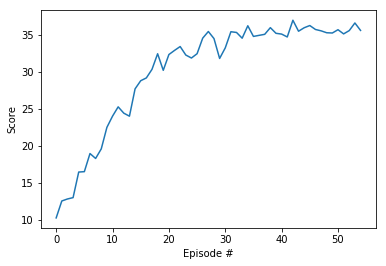

In [6]:
from train import Agent

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Hyperparameters Used
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 1e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
N_EPISODES = 1000

# All four networks structure: two hidden layers with size (256, 128)
fc1_units = 256
fc2_units = 128

CHECKPOINT_FOLDER = './Saved_Model/'

Target_Reward = 30 


agent = Agent(
                DEVICE, 
                state_size, n_agents, action_size, 4, 
                BUFFER_SIZE, BATCH_SIZE, GAMMA, TAU, LR_ACTOR, LR_CRITIC, WEIGHT_DECAY,
                fc1_units=256, fc2_units=128, checkpoint_folder=CHECKPOINT_FOLDER
        )

def ddpg_train(n_episodes=N_EPISODES, train=True):
    scores = []
    scores_window = deque(maxlen=100)
    n_episodes = N_EPISODES

    for episode in range(n_episodes):
        env_info = env.reset(train_mode=True)[brain_name]            # reset the environment
        states = env_info.vector_observations
        agent.reset()                                                # reset the agent noise
        score = np.zeros(n_agents)
        
        while True:
            actions = agent.act(states)
        
            env_info = env.step( actions )[brain_name]               # send the action to the environment                            
            next_states = env_info.vector_observations               # get the next state        
            rewards = env_info.rewards                               # get the reward        
            dones = env_info.local_done                              # see if episode has finished        
            
            if train:
                agent.step(states, actions, rewards, next_states, dones)

            score += rewards                                         # update the score
        
            states = next_states                                     # roll over the state to next time step        
                                                        
            if np.any( dones ):                                      # exit loop if episode finished        
                break                                        

        scores.append(np.mean(score))
        scores_window.append(np.mean(score))
            
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_window)), end="")
        if episode % 1 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_window)))
        if np.mean(scores_window)>=Target_Reward:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode-1, np.mean(scores_window)))
            agent.checkpoint()
            break

    return scores

# train the agent
scores = ddpg_train()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
fig.savefig('model.png')

When finished, you can close the environment.

In [7]:
env.close()